In [2]:
import os
import simulation
import pynbody
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import ipywidgets
import tqdm

In [3]:
# dirs = os.walk('/media/michele/My Book/Michele/MySimulations/MovingBox/beta')
# tuple(dirs)

In [4]:
SIM = 'mb.69002'
TRAJ = 'p300_a800_r600'
TIME_LIMIT = 12

In [5]:
from pynbody.units import kpc, km, s, Msol
M = 10*10 * Msol
L = kpc
V = km/s
T = L/V

conv_fac = T.in_units('Gyr')
conv_fac

0.9778139512067809

In [6]:
# sim = simulation.Simulation(os.path.join(SIMPATH, "{}/{}".format(SIM, TRAJ), "out"))
sim = simulation.MoriaSim(SIM[-5:])

loading simulation: 69002
Getting sumfile: /home/michele/sim/MoRIA/results/sumfiles/69002.dat


Fixing cosmological parameters of MoRIA simulation


In [9]:
def sigma(vel):
    return np.sqrt(((vel - vel.mean(axis=0))**2).mean())

In [7]:
sphere = pynbody.filt.Sphere(5 * pynbody.units.kpc)
mass = list()
r_eff = list()
for snap in tqdm.tqdm_notebook(sim.snap_list):
    pynbody.analysis.halo.center(snap.s, vel=False)
    mass.append(snap.s[sphere]['mass'].sum().in_units('Msol'))
    r_eff.append(pynbody.analysis.luminosity.half_light_r(snap))

In [10]:
sigma_star = list()
sigma_gas = list()
for snap in tqdm.tqdm_notebook(sim.snap_list):
    sigma_star.append(sigma(snap.s[sphere]['vel']))
    sigma_gas.append(sigma(snap.g[sphere]['vel']))

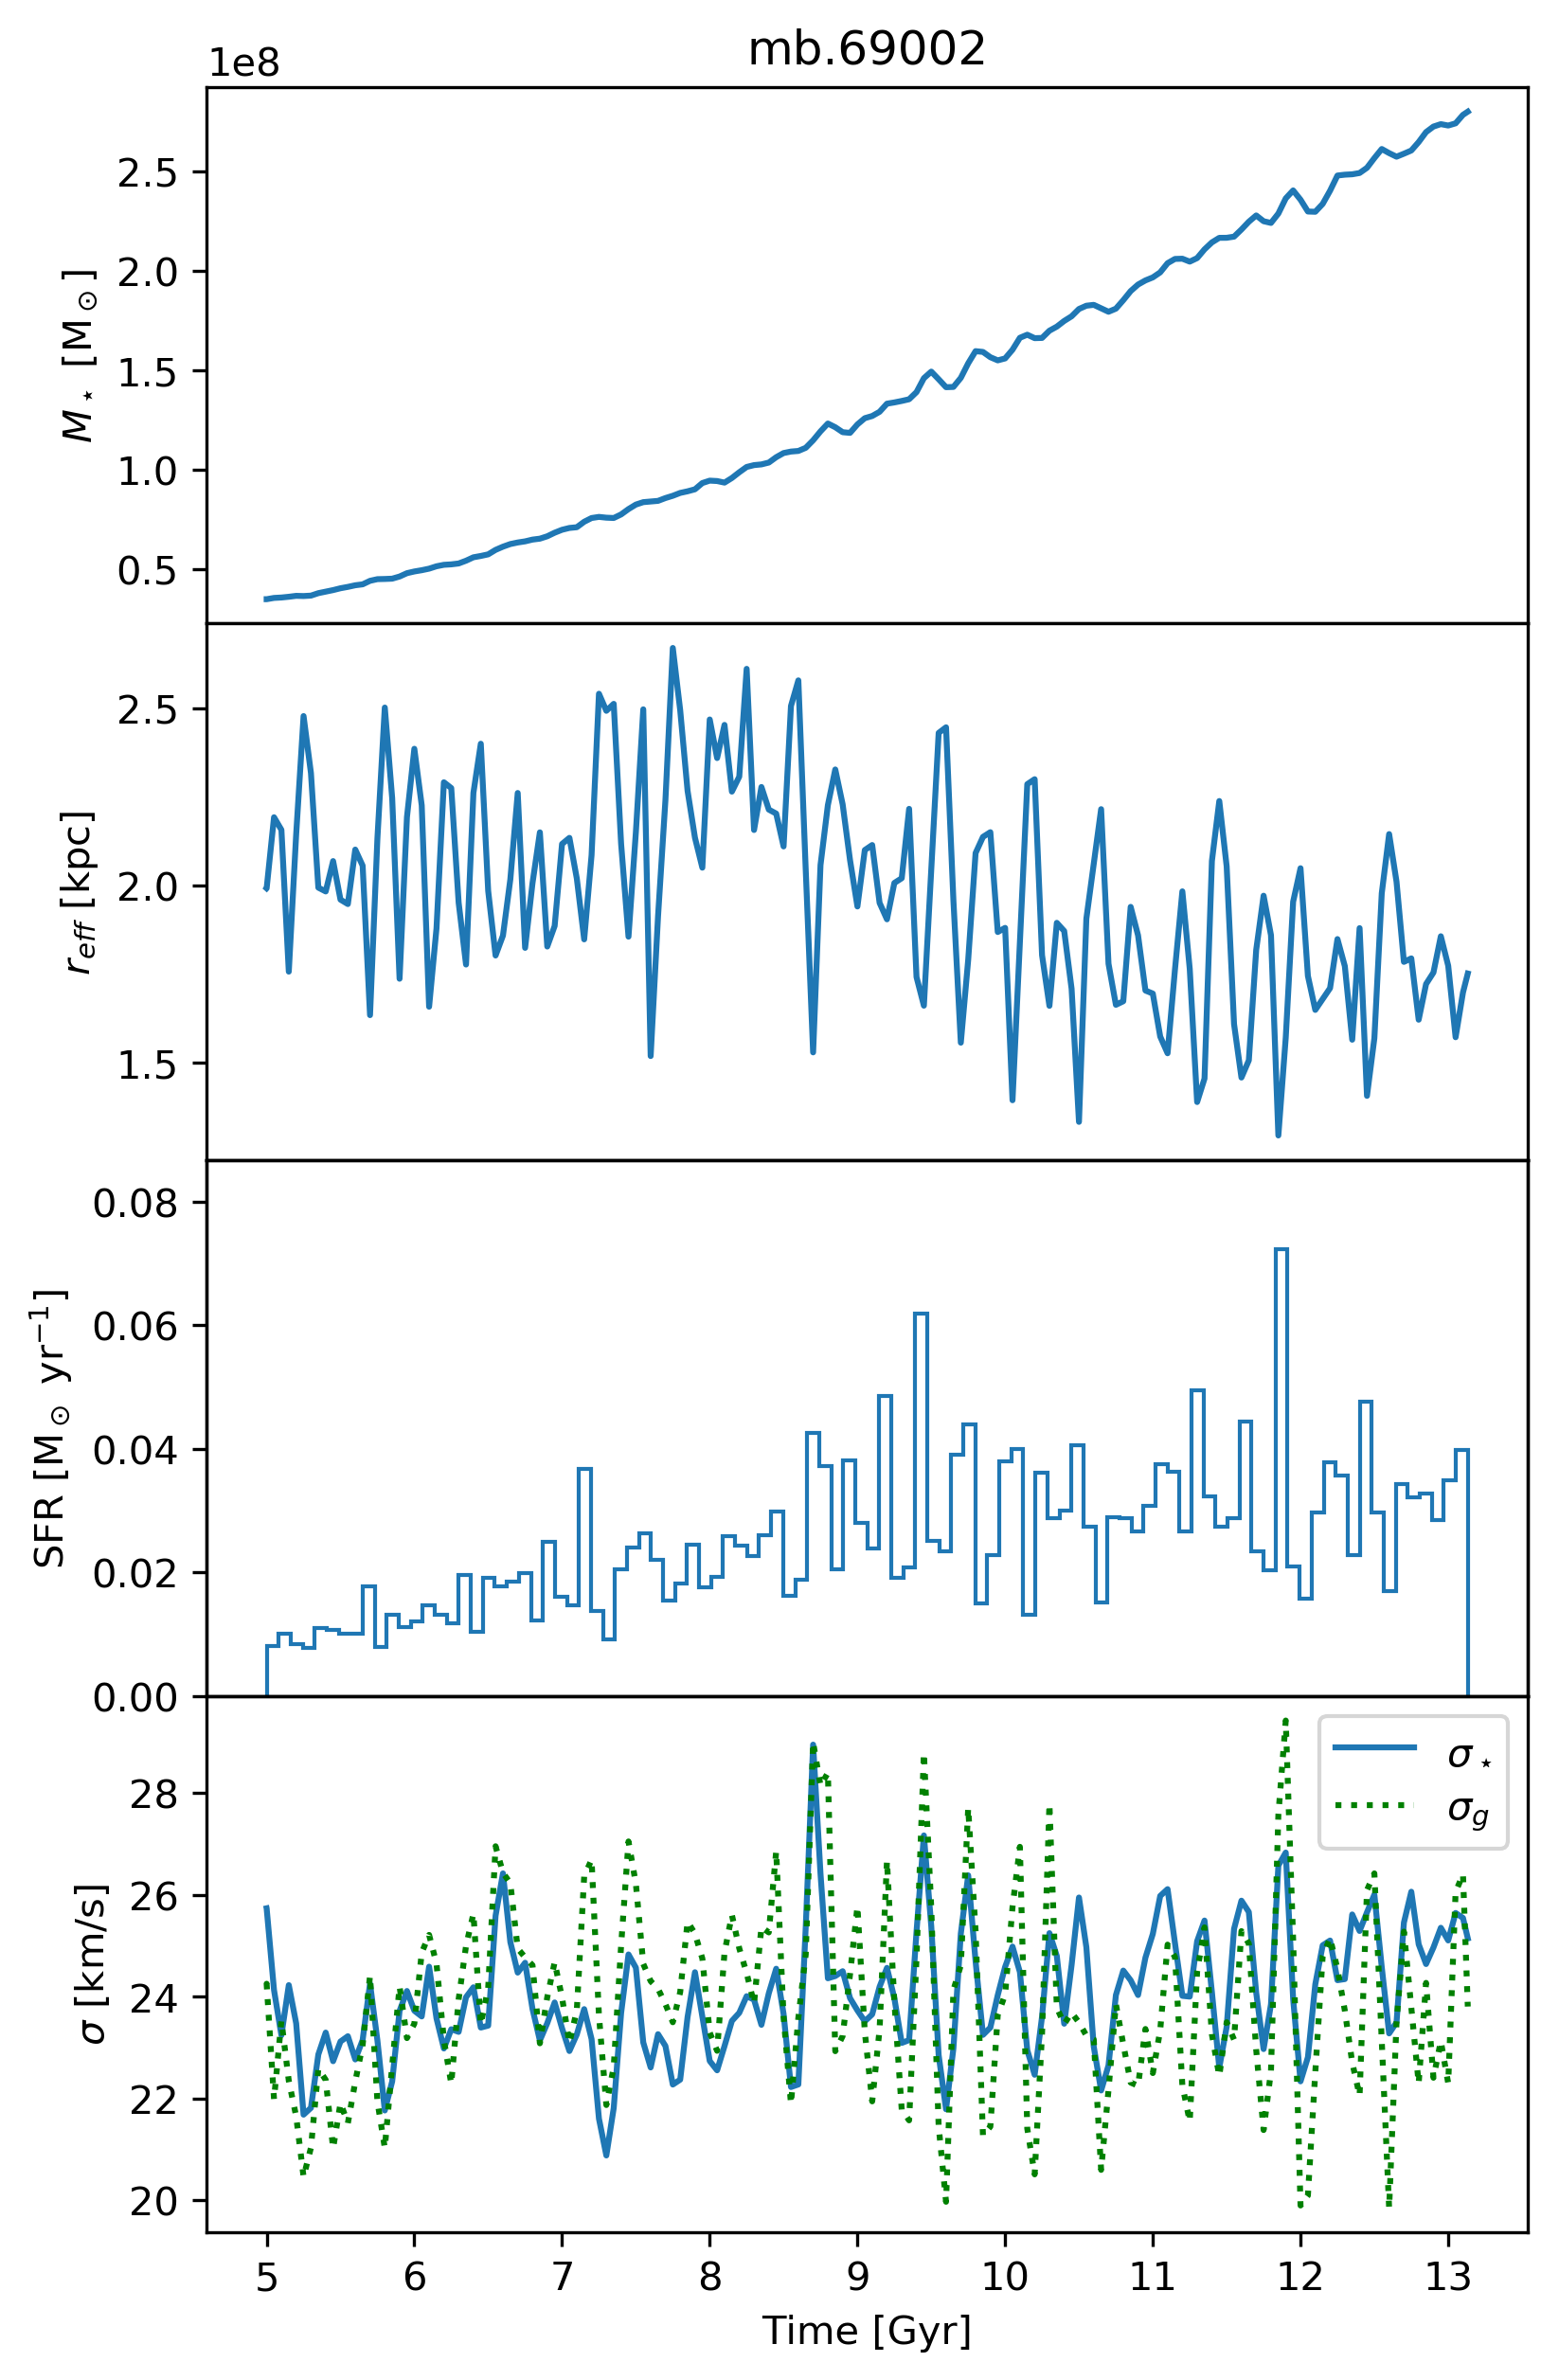

In [15]:
fig, (ax_m_star, ax_r_eff, ax_sfh, ax_sigma) = plt.subplots(4, figsize=(6,10), dpi=300)
times = sim.times
ax_m_star.plot(sim.times, mass)
ax_m_star.set_xlabel("Time [Gyr]")
ax_m_star.set_ylabel("$M_\star$ [M$_\odot]$");
ax_m_star.ticklabel_format(style='sci', scilimits=(0,0))

ax_r_eff.plot(sim.times, r_eff)
ax_r_eff.set_xlabel("Time [Gyr]")
ax_r_eff.set_ylabel("$r_{eff}$ [kpc]");

sim.plot_sfh(ax_sfh, range=(sim.times[0], sim.times[-1]));

# ax_r.plot(sim.trace.t, sim.trace.r, '--', color='r', alpha=0.5, label='$d$')
# ax_ram.plot(sim.dens_trace.t*conv_fac, sim.ram_pressure, color='g')
# ax_ram.set_xlabel("Time [Gyr]")
# ax_ram.set_ylabel(r"""$\rho v^2$
# [$10^{10}$ M$_\odot$ (km/s)$^2$]""");

ax_sigma.plot(sim.times, sigma_star, label='$\sigma_\star$')
ax_sigma.plot(sim.times, sigma_gas, 'g:', label='$\sigma_g$')
ax_sigma.set_xlabel("Time [Gyr]")
ax_sigma.set_ylabel("$\sigma$ [km/s]");
ax_sigma.legend();
# [a.semilogy() for a in fig.axes]

# for ax in fig.axes:
#     ax.set_xlim(sim.times[0], 9)
    
fig.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in fig.axes[:-2]], visible=False);

ax_z = fig.axes[4]
ax_z.set_xlabel('')
plt.setp(ax_z.get_xticklabels(), visible=False)
plt.setp(ax_z.get_xticklines(), visible=False);
ax_m_star.set_title('{}'.format(SIM, TRAJ));

In [11]:
# data = [sim.times, mass, sigma_star, sigma_gas, r_eff]

# import pickle
# with open('moria{}.pickle'.format(SIM[-5:]), 'wb') as f:
#     pickle.dump(data, f)

In [14]:
!ls *.pickle

OSError: [Errno 12] Cannot allocate memory

In [12]:
#fig.savefig('moria{}.png'.format(SIM[-5:],TRAJ))

In [13]:
sim[-1].header.time

11.6895894618

In [12]:
# from parse_trace import parse_dens_trace
# sim.dens_trace1 = parse_dens_trace(sim._sim_dir + '/dens_temp_trace.txt')
# ram_pressure = sim.dens_trace1.vel**2 * sim.dens_trace1.rho

In [13]:
ax_ram = ax_m_star.twinx()

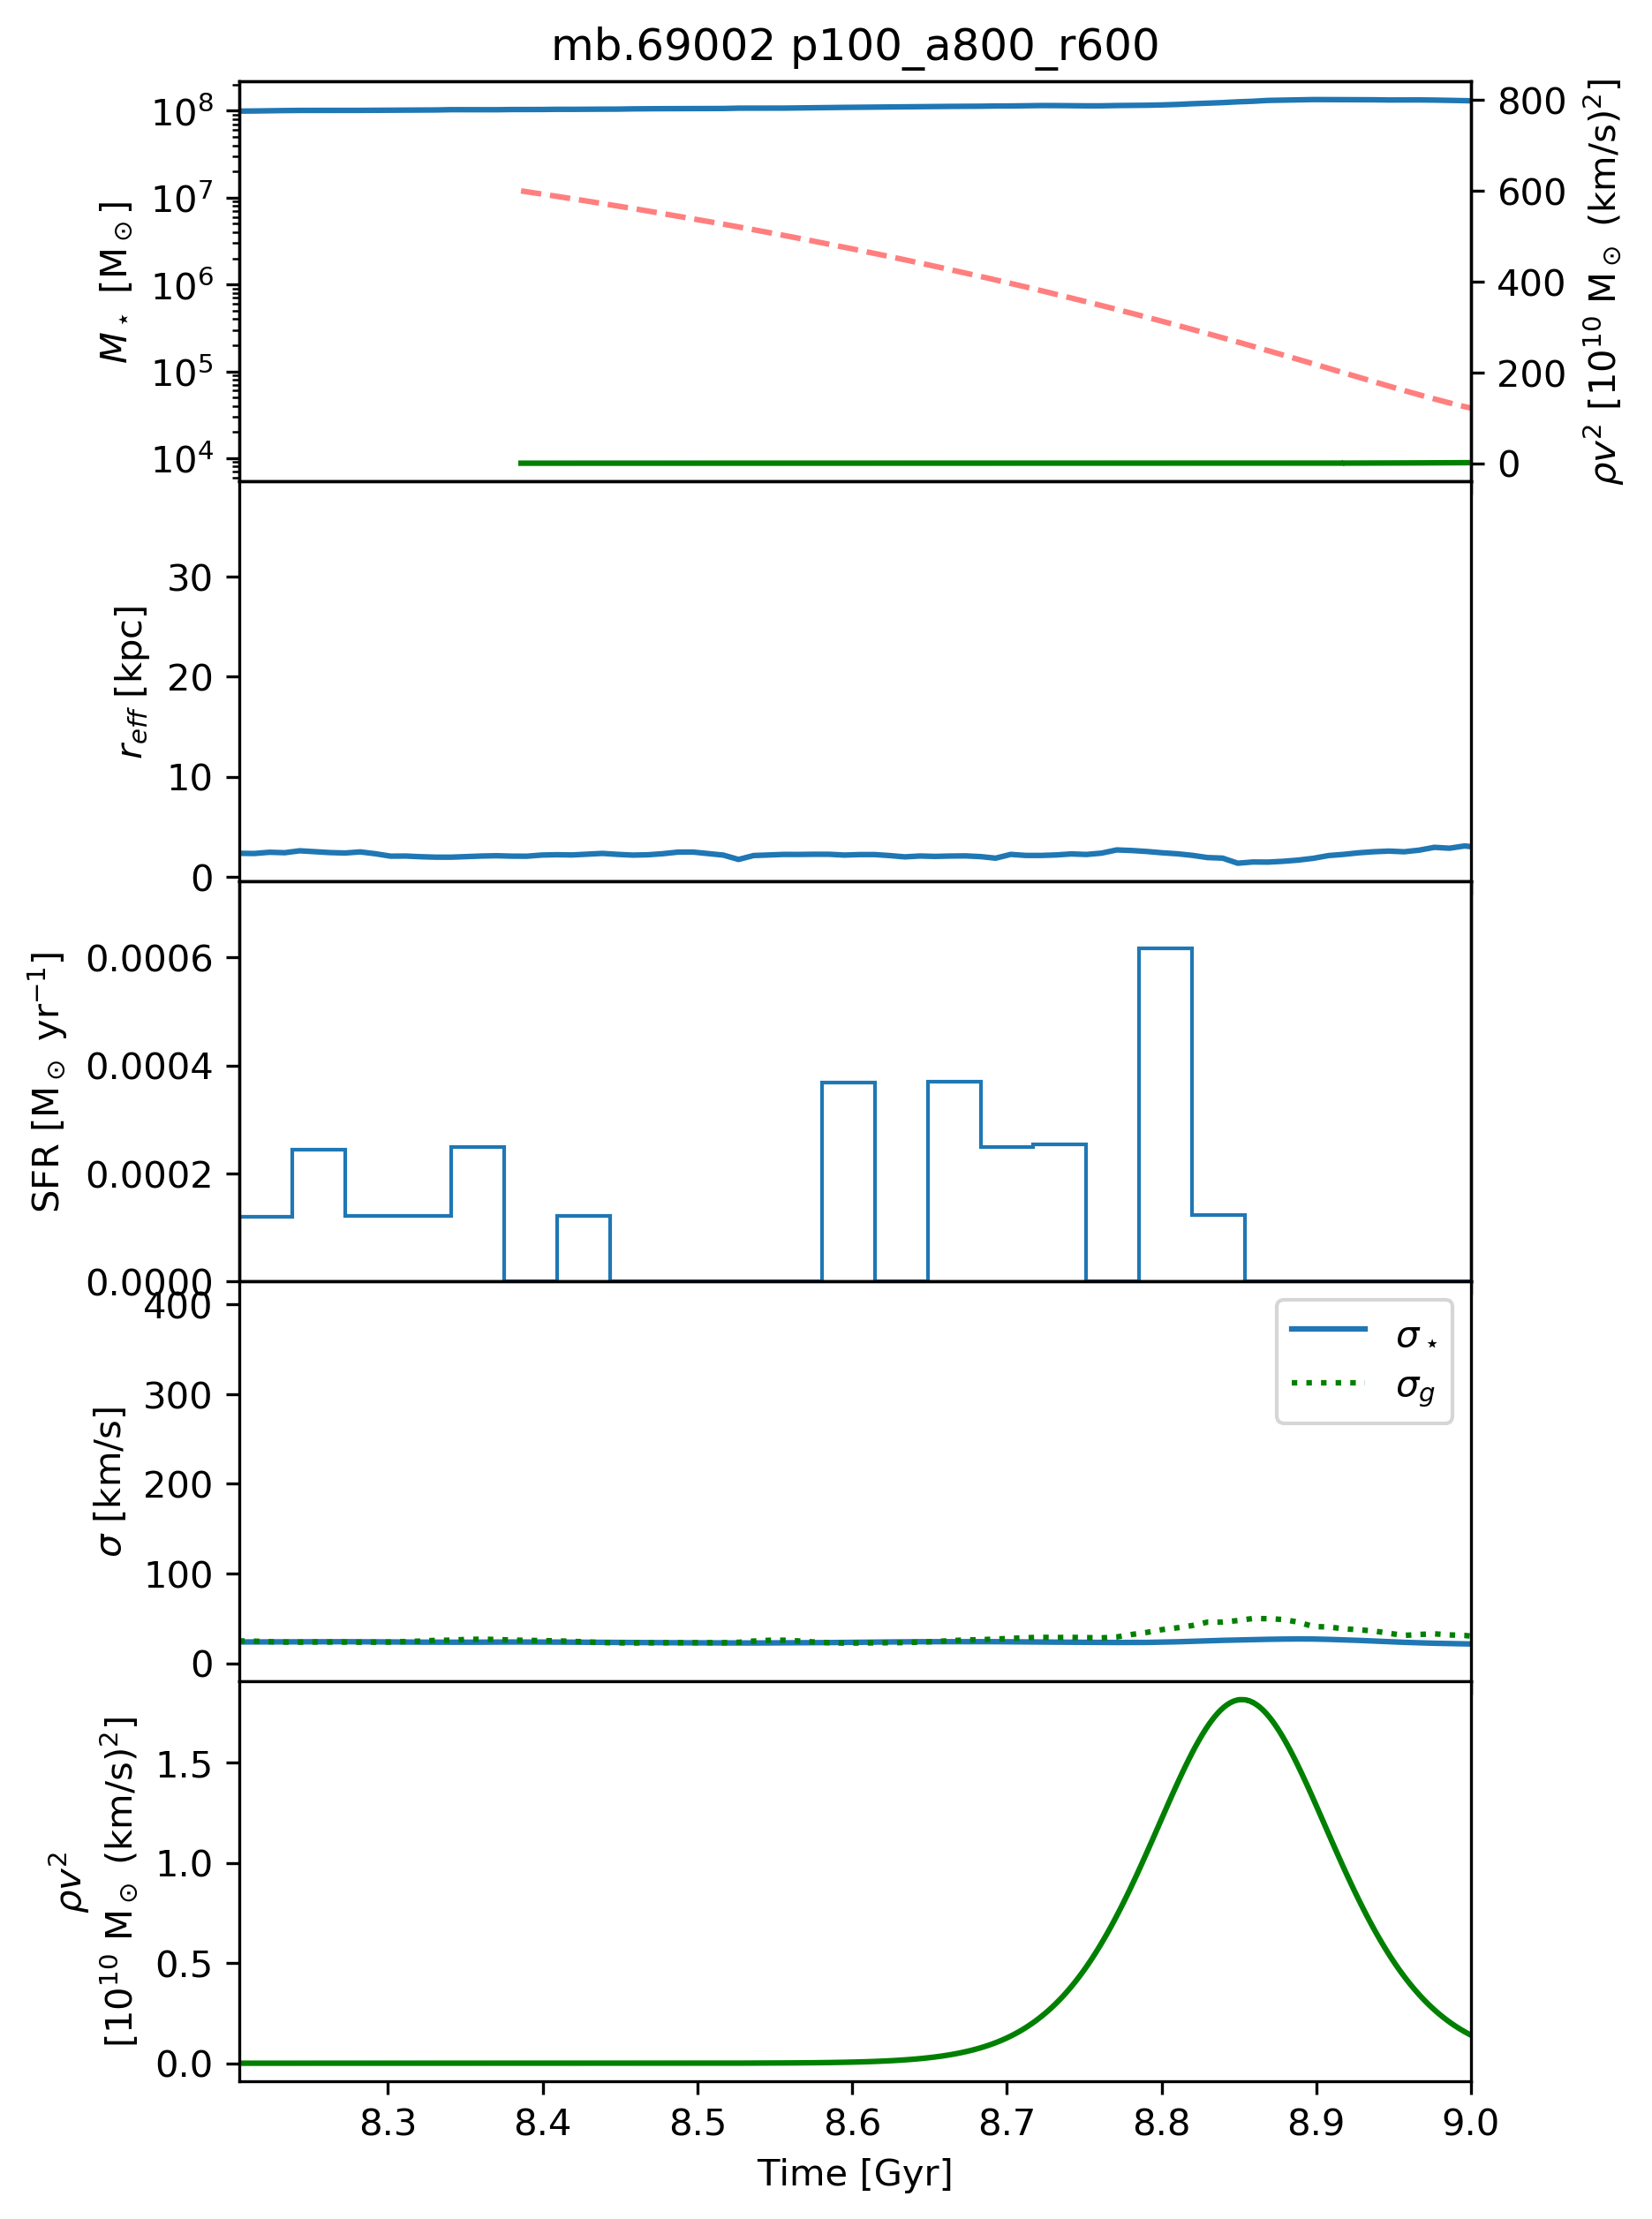

In [14]:
ax_ram.plot(sim.dens_trace.t, sim.ram_pressure, color='g')
ax_ram.set_ylabel(r"$\rho v^2$ [$10^{10}$ M$_\odot$ (km/s)$^2$]");
# ax_ram.semilogy()
ax_m_star.semilogy()
ax_ram.plot(sim.trace.t, sim.trace.r, '--', color='r', alpha=0.5, label='$d$')
fig

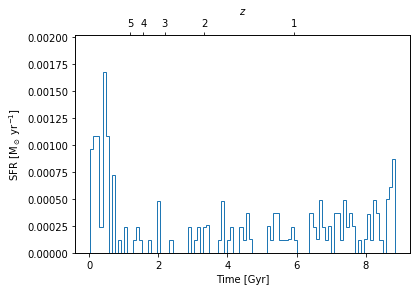

In [15]:
fig2, ax_sfh = plt.subplots(1)
sim.plot_sfh(ax_sfh);